
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Attack Type
Normal Traffic    1715
DDoS              1715
Port Scanning     1714
Web Attacks       1714
Brute Force       1714
Bots              1714
DoS               1714
Name: count, dtype: int64


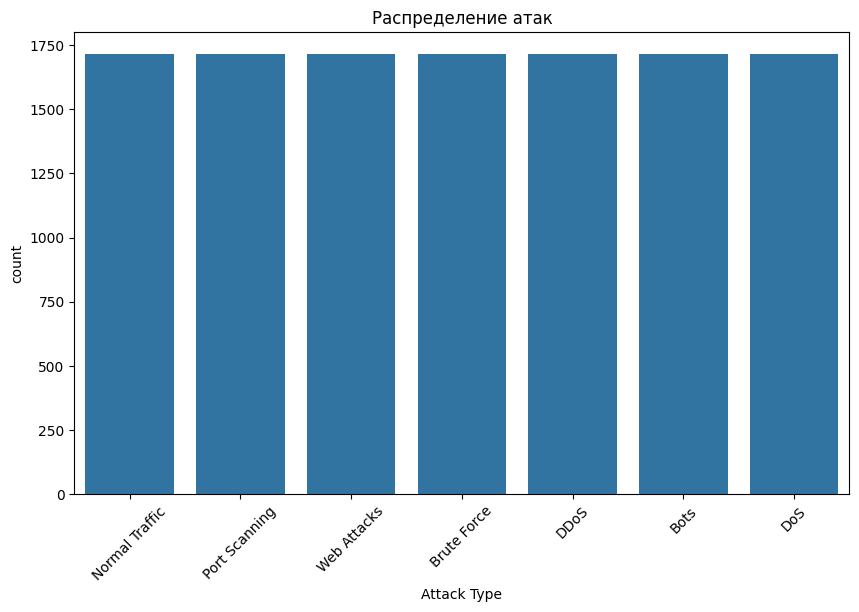

In [3]:
!pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка
cic = pd.read_csv('../data/cicids2017_processed.csv')
msc = pd.read_csv('../data/mscad_processed.csv')
csi = pd.read_csv('../data/csic2010_processed.csv')

# Объединение
combined = pd.concat([cic, msc], ignore_index=True)

# Баланс
print(combined['Attack Type'].value_counts())

# График
plt.figure(figsize=(10,6))
sns.countplot(data=combined, x='Attack Type')
plt.xticks(rotation=45)
plt.title("Распределение атак")
plt.show()

Распределение по Attack Type:
Attack Type
Normal Traffic    1715
DDoS              1715
Port Scanning     1714
Web Attacks       1714
Brute Force       1714
Bots              1714
DoS               1714
Name: count, dtype: int64



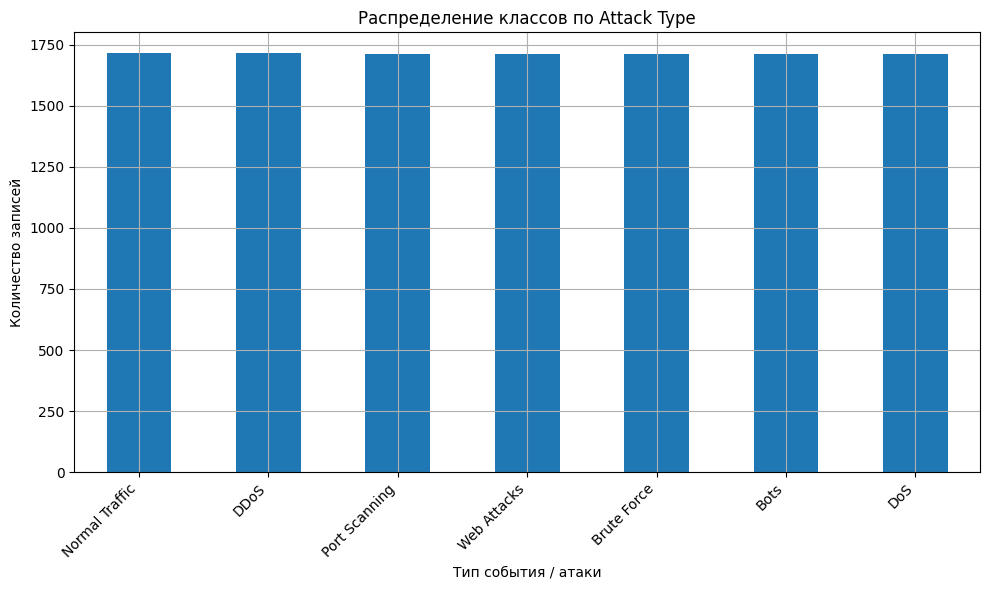

Баланс нормального трафика и атак:
Normal     1715
Attack    20285
dtype: int64



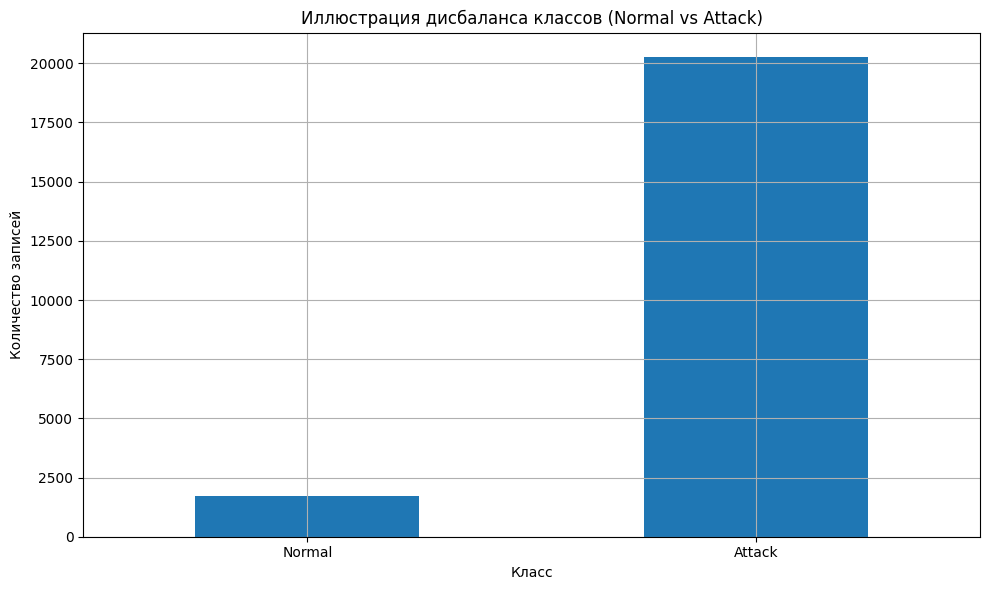

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Настройки для графиков (опционально)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# 1. Загрузка данных
cic = pd.read_csv('../data/cicids2017_processed.csv')
msc = pd.read_csv('../data/mscad_processed.csv')
csi = pd.read_csv('../data/csic2010_processed.csv')

# 2. Объединение (если CSIC пока не используешь в этой диаграмме – можно не добавлять)
combined = pd.concat([cic, msc], ignore_index=True)

# 3. Распределение по Attack Type
print("Распределение по Attack Type:")
print(combined['Attack Type'].value_counts())
print()

# --- График 1: распределение по всем типам атак (как было раньше) ---

plt.figure()
attack_counts = combined['Attack Type'].value_counts()
attack_counts.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Тип события / атаки")
plt.ylabel("Количество записей")
plt.title("Распределение классов по Attack Type")
plt.tight_layout()
plt.show()

# --- График 2: дисбаланс 'норма' vs 'атака' ---

# Предполагаем, что нормальный трафик помечен как 'BENIGN'.
# Если у тебя другое имя класса — поменяй значение NORMAL_LABEL.
NORMAL_LABEL = "Normal Traffic"

is_normal = combined['Attack Type'] == NORMAL_LABEL
class_balance = pd.Series({
    'Normal': is_normal.sum(),
    'Attack': (~is_normal).sum()
})

print("Баланс нормального трафика и атак:")
print(class_balance)
print()

plt.figure()
class_balance.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Класс")
plt.ylabel("Количество записей")
plt.title("Иллюстрация дисбаланса классов (Normal vs Attack)")
plt.tight_layout()
plt.show()


In [8]:
combined.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Std,Idle Std,Label,dest_port
0,80.0,5121659,3.0,12.0,6.0,0.0,4.0,3.464102,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.0,128476,1.0,53.0,53.0,53.0,53.0,0.000000,116.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.0,23701,1.0,53.0,53.0,53.0,53.0,0.000000,69.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54549.0,4,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,252129,1.0,58.0,58.0,58.0,58.0,0.000000,202.0,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
